In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import torch

import numpy as np
import matplotlib.pylab as plt

from os.path import join
from pathlib import Path

from models.CustomVQVAE import VQVAE_PL

import pytorch_lightning as pl

from torchvision.utils import make_grid
from customLoader import CustomMinecraftData
from torchvision.transforms import transforms


In [3]:
conf = {
  'num_hiddens': 64,
  'num_residual_hiddens': 32,
  'num_residual_layers': 2,
  'embedding_dim': 256,
  'num_embeddings': 10,
  'commitment_cost': 0.25,
  'decay': 0.99,
  'reward_type': 'sparse'
}

In [4]:
vqvae = VQVAE_PL("pixel", **conf).cuda()
vqvae.eval()

VQVAE_PL(
  (model): PixelVQVAE(
    (_encoder): Encoder(
      (_conv_1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_5): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_residual_stack): ResidualStack(
        (_layers): ModuleList(
          (0): Residual(
            (_block): Sequential(
              (0): ReLU(inplace=True)
              (1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (2): ReLU(inplace=True)
              (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            )
          )
          (1): Residual(
            (_block): Sequential(
              (0): ReLU(inplace=True)
              (1): Co

In [5]:
vqvae.model._vq_vae._embedding.weight

Parameter containing:
tensor([[-0.1404, -0.0508,  0.4998,  ...,  1.8251, -1.2384,  1.2117],
        [ 0.3650,  1.2643, -1.3491,  ..., -1.0328, -0.4490, -0.6091],
        [-1.5495, -0.7466, -0.7222,  ...,  0.2595, -0.4238, -0.1535],
        ...,
        [ 0.8242, -0.4456,  0.2456,  ..., -0.1024, -0.2389, -1.0544],
        [ 0.1594, -1.1967, -0.3884,  ...,  1.9067, -1.4110,  0.2731],
        [ 0.4151,  0.2823,  1.1213,  ..., -1.0155,  2.3710, -0.0185]],
       device='cuda:0', requires_grad=True)

In [6]:
path = '../results/vqvae_0.2/mineRL/y77fc26u/checkpoints/epoch=808-step=61483.ckpt'

path = '../results/vqvae_0.1/mineRL/2wgoga4p/checkpoints/epoch=833-step=62549.ckpt'
path = '../results/vqvae_0.3/mineRL/1c4o6jgy/checkpoints/epoch=499-step=37999.ckpt'
path = '../results/vqvae_2.0/mineRL/kbsmulhw/checkpoints/epoch=49-step=4499.ckpt'
path = '../results/vqvae_3.1/mineRL/8ykl37mx/checkpoints/epoch=59-step=5399.ckpt'
path = '../results/vqvae_3.0/mineRL/2vm6qyu3/checkpoints/epoch=59-step=5399.ckpt'
path = '../results/vqvae_sweep_0/mineRL/8bbcrmgb/checkpoints/epoch=34-step=3149.ckpt'

path = '../results/vqvae_CW0_realistic_pixels.0/mineRL/nqxebkf7/checkpoints/epoch=39-step=4999.ckpt'
path = '../results/vqvae_exp_1/mineRL/mlq3n3be/checkpoints/epoch=39-step=11679.ckpt'
path = '../results/vqvae_CW0-4_realistic_pixels.0/mineRL/1bvif2wt/checkpoints/epoch=13-step=6839.ckpt'
path = '../results/vqvae_pixelcoord_official_CW4/mineRL/1x6kitto/checkpoints/epoch=24-step=3124.ckpt'
path = '../results/vqvae_Expert_pixels_0/mineRL/3l23j1s9/checkpoints/epoch=8-step=7831.ckpt'
checkpoint = torch.load(path)


In [7]:
vqvae.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [8]:
vqvae.model._vq_vae._embedding.weight

Parameter containing:
tensor([[2.2632e-03, 1.9156e-06, 7.6004e-06,  ..., 9.2049e-02, 3.2252e-01,
         2.6720e-05],
        [5.5357e-02, 3.3118e-08, 2.1741e-06,  ..., 5.1986e-03, 3.8576e-01,
         6.7741e-06],
        [1.6064e-01, 2.0601e-07, 2.6477e-07,  ..., 5.7954e-01, 1.2638e+00,
         5.1154e-06],
        ...,
        [4.9397e-01, 2.0360e-05, 2.1462e-07,  ..., 1.5232e+00, 3.6955e-02,
         9.2548e-07],
        [4.4571e-01, 7.2325e-07, 2.0812e-07,  ..., 1.5587e+00, 1.4287e+00,
         7.4323e-07],
        [2.7400e-01, 1.3212e-07, 1.0149e-07,  ..., 1.3260e+00, 1.1925e+00,
         4.8588e-07]], device='cuda:0', requires_grad=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


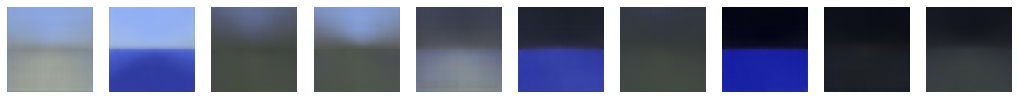

In [9]:
list_imgs, _ = vqvae.model.list_reconstructions()
fig, axes = plt.subplots(ncols=len(list_imgs), figsize=(18,10))
for i, ax in enumerate(axes):
    
    img = list_imgs[i] + 0.5
    img[img>1] = 1
    ax.imshow(img)
    ax.axis('off')
plt.show()
#plt.savefig(f'/home/juanjo/Pictures/Minecraft/centroides/vqvae_pixelcoord_CW4.png', transparent=True)
    

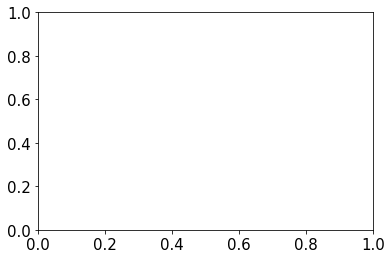

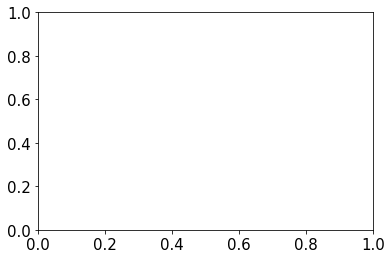

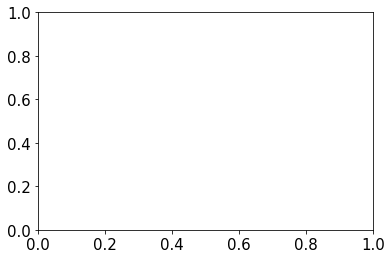

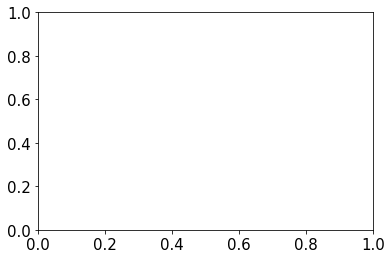

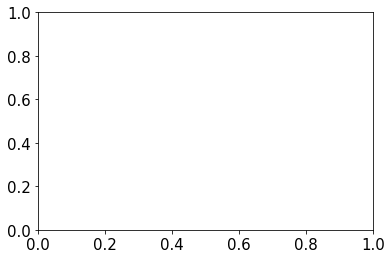

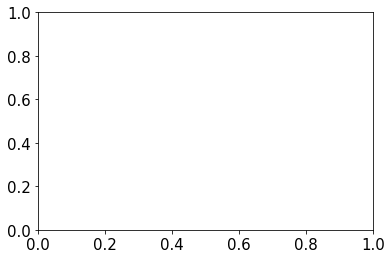

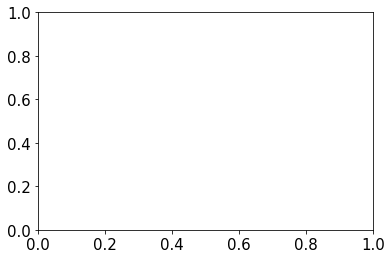

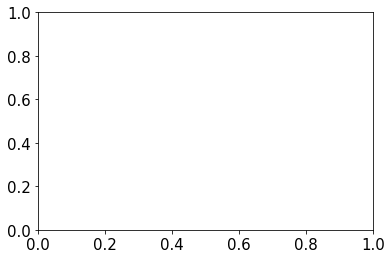

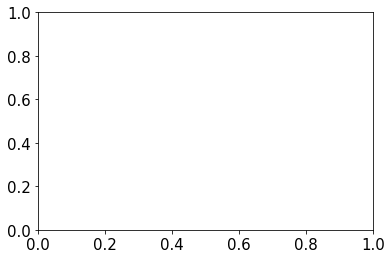

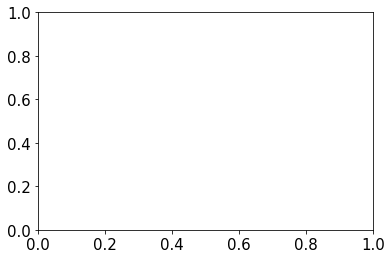

In [10]:
list_imgs, list_coords = vqvae.model.list_reconstructions()

#for i, (img, coord) in enumerate(zip(list_imgs, list_coords)):
for i, img in enumerate(list_imgs):
    fig, ax = plt.subplots()    
    img = img + 0.5
    img[img>1] = 1
    img[img<0] = 0
    
    plt.imsave(f'/home/juanjo/Documents/minecraft/mineRL/src/goal_states/vqvae_Expert_pixels_0/{i}_img.png', img)
    #with open(f'/home/juanjo/Documents/minecraft/mineRL/src/goal_states/CW4_VQVAE/{i}_coord.npy', 'wb') as f:
    #    np.save(f, coord)
    

array([[[0.54322934, 0.63388085, 0.7811202 ],
        [0.5251064 , 0.67878425, 0.9137026 ],
        [0.52297914, 0.68388236, 0.93375486],
        ...,
        [0.52119756, 0.68781465, 0.93813336],
        [0.5093708 , 0.6767975 , 0.91708356],
        [0.5305155 , 0.624581  , 0.7907203 ]],

       [[0.52836543, 0.68255496, 0.8871194 ],
        [0.52541286, 0.7014136 , 0.92960274],
        [0.52903134, 0.7003497 , 0.9446289 ],
        ...,
        [0.5198469 , 0.6887752 , 0.949437  ],
        [0.5177571 , 0.68353516, 0.9260898 ],
        [0.5260165 , 0.6729547 , 0.8934993 ]],

       [[0.538458  , 0.6792356 , 0.8975865 ],
        [0.52975315, 0.69256437, 0.94520754],
        [0.5195842 , 0.68771726, 0.9523587 ],
        ...,
        [0.52788156, 0.706172  , 0.9555649 ],
        [0.5147559 , 0.6975432 , 0.95399934],
        [0.5311152 , 0.68149906, 0.90864563]],

       ...,

       [[0.6679728 , 0.68802655, 0.5991935 ],
        [0.7356437 , 0.72603434, 0.5574893 ],
        [0.7587335 , 0